<a href="https://colab.research.google.com/github/sanidhya2506/ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1️⃣: Import all required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Step 2️⃣: Load the CIFAR-10 dataset
# CIFAR-10 has 60,000 color images (32x32x3) and 10 classes
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Step 3️⃣: Define class names for better readability
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


/tmp/ipython-input-4066949222.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(train_labels[i])])


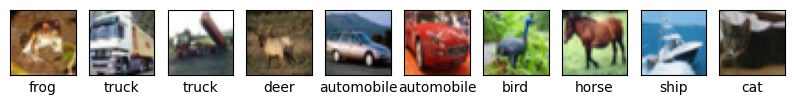

In [4]:
# Step 4️⃣: Visualize a few training images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()


In [5]:
# Step 5️⃣: Build the CNN model
model = models.Sequential([
    # 1️⃣ Convolutional layer: 32 filters, 3x3 kernel
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),  # reduces image size by half

    # 2️⃣ Another convolution + pooling layer for deeper features
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # 3️⃣ Third convolution layer (no pooling here)
    layers.Conv2D(64, (3,3), activation='relu'),

    # 4️⃣ Flatten converts 2D feature maps into 1D
    layers.Flatten(),

    # 5️⃣ Dense (fully connected) layer
    layers.Dense(64, activation='relu'),

    # 6️⃣ Output layer — 10 neurons for 10 classes (softmax gives probabilities)
    layers.Dense(10, activation='softmax')
])

model.summary()  # shows layer details


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Step 6️⃣: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Step 7️⃣: Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.3549 - loss: 1.7485 - val_accuracy: 0.5553 - val_loss: 1.2508
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.5880 - loss: 1.1690 - val_accuracy: 0.6322 - val_loss: 1.0348
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6476 - loss: 1.0015 - val_accuracy: 0.6563 - val_loss: 0.9818
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6909 - loss: 0.8810 - val_accuracy: 0.6576 - val_loss: 0.9773
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7210 - loss: 0.8008 - val_accuracy: 0.6991 - val_loss: 0.8782
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7433 - loss: 0.7345 - val_accuracy: 0.6866 - val_loss: 0.9161
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7625 - loss: 0.6774 - val_accuracy: 0.6891 - val_loss: 0.9302
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7827 -

In [8]:
# Step 8️⃣: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 3s - 8ms/step - accuracy: 0.7090 - loss: 0.8877

✅ Test Accuracy: 70.90%


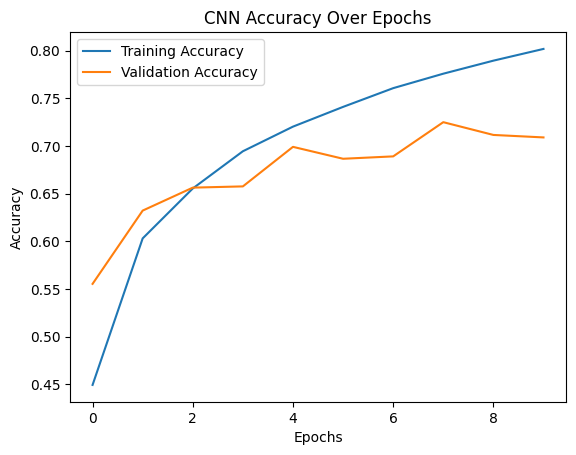

In [9]:
# Step 9️⃣: Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/tmp/ipython-input-1178722924.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = int(test_labels[i])


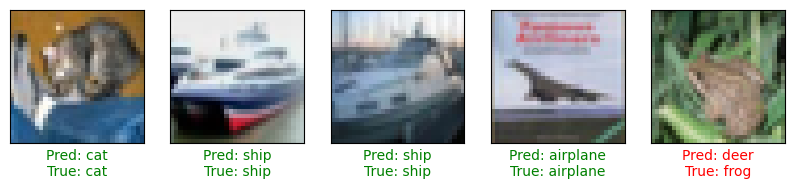

In [10]:
# 🔟 Step 10: Make some predictions
predictions = model.predict(test_images[:5])

plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    plt.xticks([]); plt.yticks([])
    predicted_label = np.argmax(predictions[i])
    true_label = int(test_labels[i])
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)
plt.show()
